# **The Loudness of Spotify Tracks Over Time**

<div style="background-color: #f0f0f0; padding: 10px; border-bottom: 1px solid #ccc; text-align: left;">
    <a href="1_main.html" target="_self" style="margin: 0 15px; font-weight: bold; text-decoration: none; font-size: 18px;">Data Setup</a> | 
    <a href="2_visualization.html" target="_self" style="margin: 0 15px; font-weight: bold; text-decoration: none; font-size: 18px;">Visualization</a> | 
    <a href="3_model.html" target="_self" style="margin: 0 15px; font-weight: bold; text-decoration: none; font-size: 18px;">Model and Conclusion</a>
</div>

# Visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/tracks.csv')

df['duration_min'] = df['duration_ms'] / 60000

# Remove rows without release dates
df = df.dropna(subset=['release_date'])

# Convert ISO8601 date YYYY-MM-DD to just YYYY
df['release_year'] = pd.to_datetime(df['release_date'], format='ISO8601').dt.year

# Attempt to trim off excessively long tracks like podcasts
df_sub = df[
    (df['duration_min'] < 15) &
    (df['release_year'] >= 1921)
    ].copy()

## [4] Visualize the Data

### [4.1] Average Popularity by Loudness (Bar Chart)

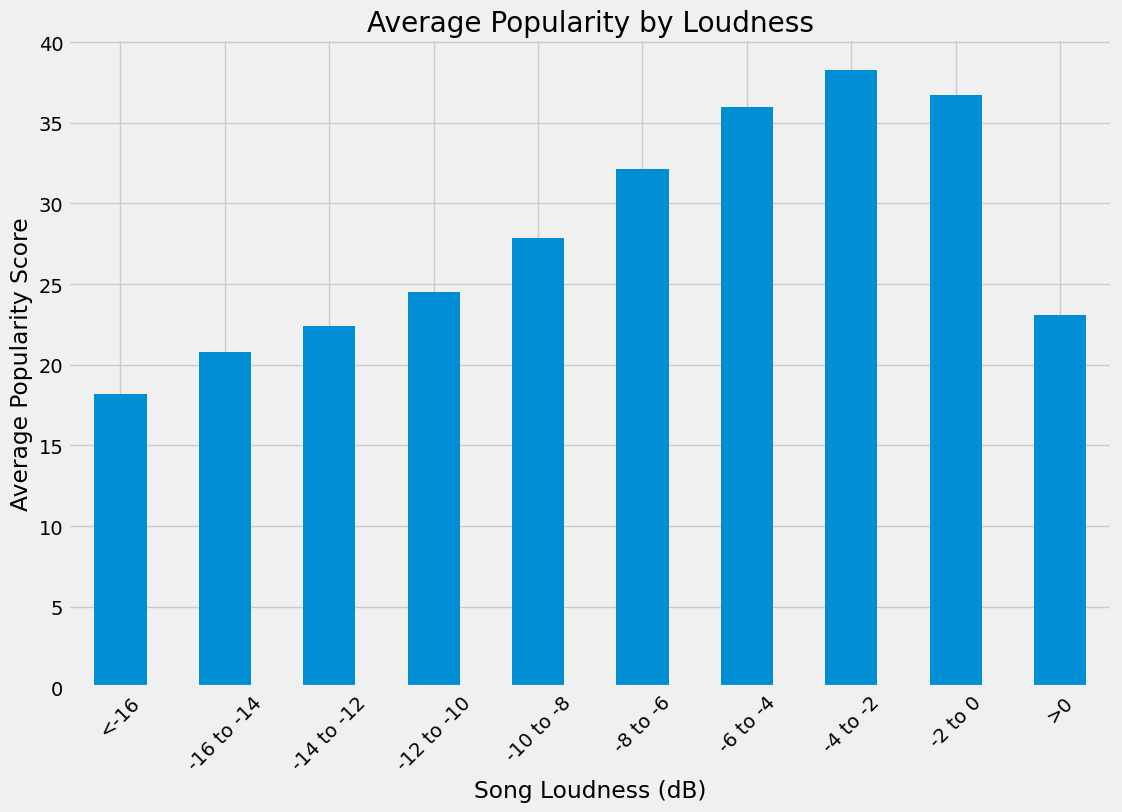

In [10]:
# Change style of Matplotlib
plt.style.use('fivethirtyeight')

# Define bins
loudness_bins = [-20, -16, -14, -12, -10, -8, -6, -4, -2, 0, 15]
loudness_labels = ['<-16', '-16 to -14', '-14 to -12', '-12 to -10', '-10 to -8', '-8 to -6', '-6 to -4', '-4 to -2', '-2 to 0', '>0']
df_sub['loudness_bin'] = pd.cut(df_sub['loudness'], bins=loudness_bins, labels=loudness_labels)

# Create bar chart data
average_popularity_by_year = df_sub.groupby('loudness_bin', observed=True)['popularity'].mean()

plt.figure(figsize=(12, 8))
average_popularity_by_year.plot(kind='bar')
plt.title('Average Popularity by Loudness')
plt.xlabel('Song Loudness (dB)')
plt.ylabel('Average Popularity Score')
plt.xticks(rotation=45)
plt.show()

### [4.2] Average Popularity by Length (Bar Chart)

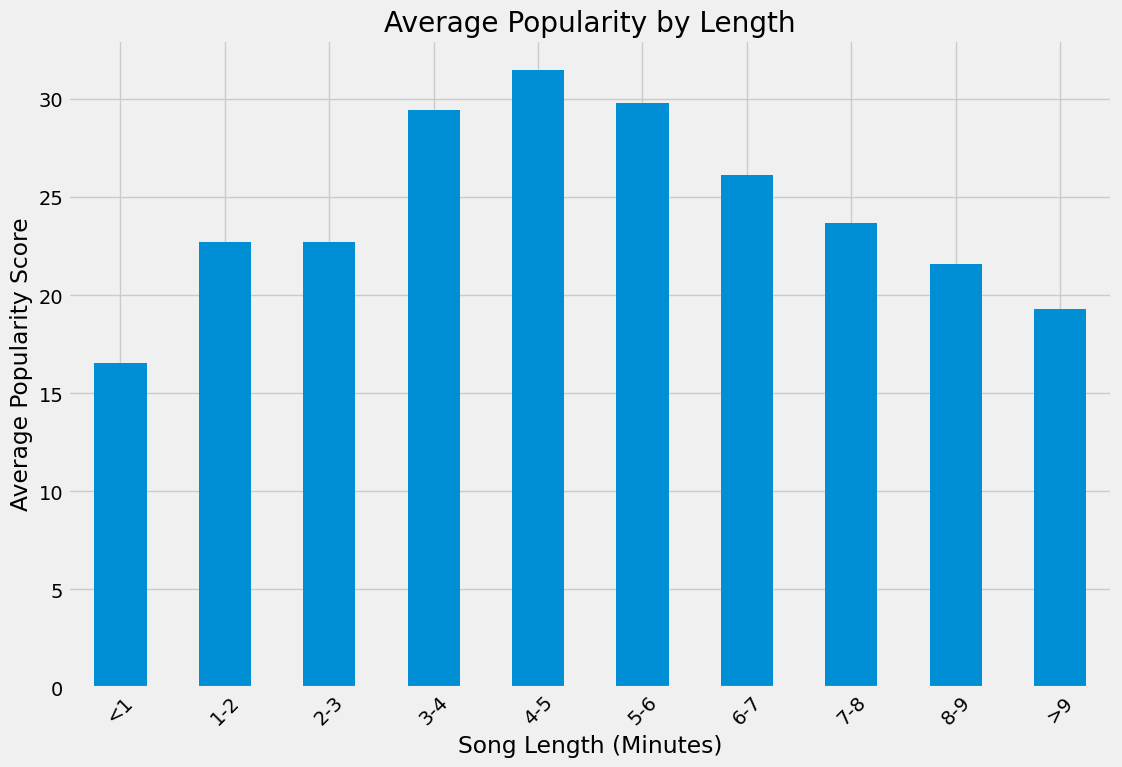

In [11]:
# Define bins
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 15]
labels = ['<1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '>9']
df_sub['duration_bin'] = pd.cut(df_sub['duration_min'], bins=bins, labels=labels)

# Create bar chart data
average_popularity_by_year = df_sub.groupby('duration_bin', observed=True)['popularity'].mean()

plt.figure(figsize=(12, 8))
average_popularity_by_year.plot(kind='bar')
plt.title('Average Popularity by Length')
plt.xlabel('Song Length (Minutes)')
plt.ylabel('Average Popularity Score')
plt.xticks(rotation=45)
plt.show()

### [4.3] History of Song Loudness (Line Plot)

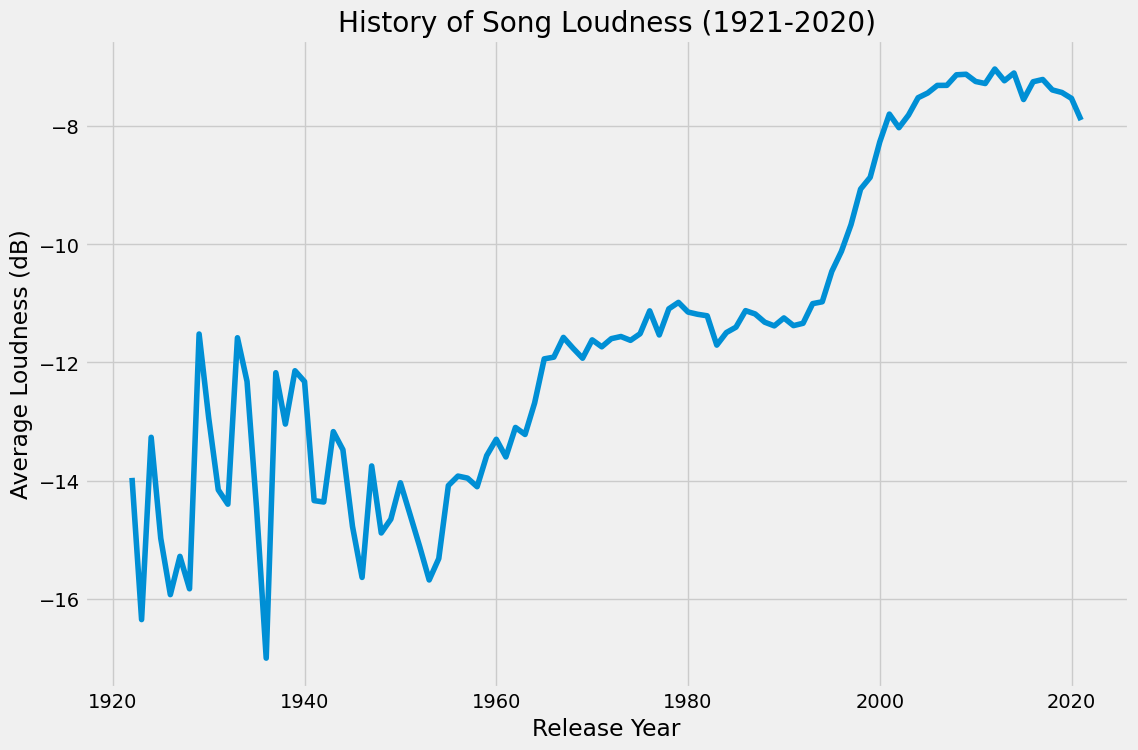

In [7]:
# Group by year to get trend of song length
average_length_by_year = df_sub.groupby('release_year')['loudness'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_length_by_year.index, average_length_by_year.values)
plt.title('History of Song Loudness (1921-2020)')
plt.xlabel('Release Year')
plt.ylabel('Average Loudness (dB)')
plt.show()

### [4.4] History of Song Length (Line Plot)

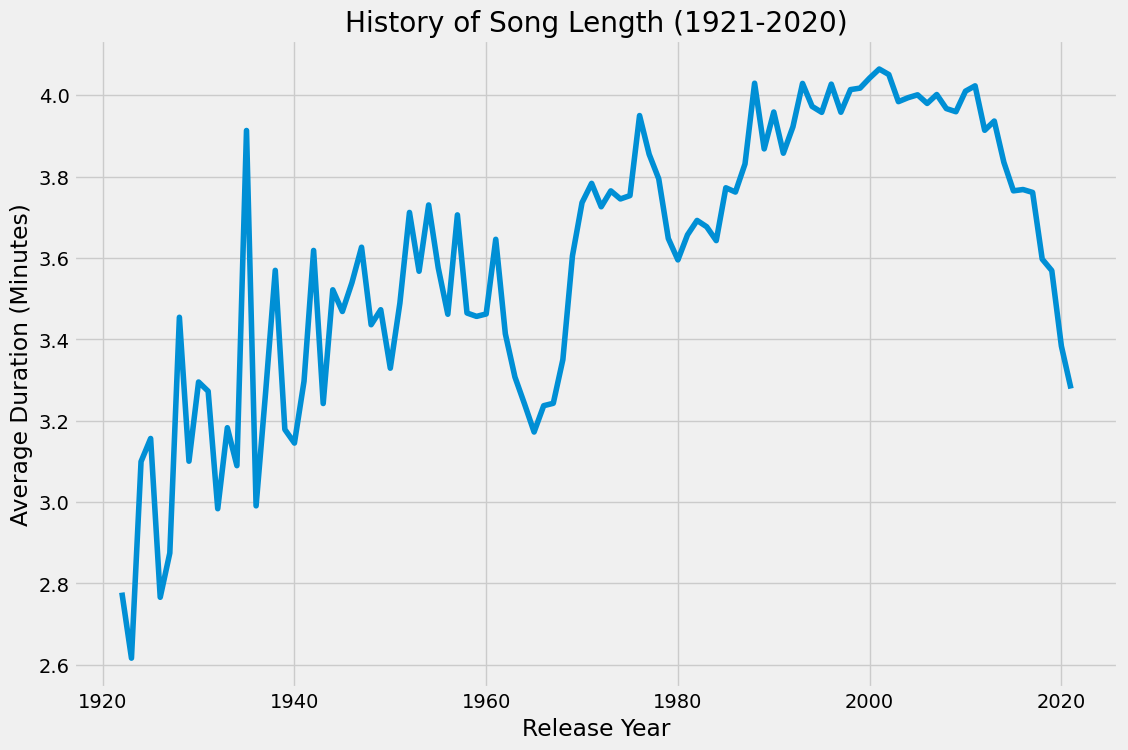

In [8]:
# Group by year to get trend of song length
average_length_by_year = df_sub.groupby('release_year')['duration_min'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_length_by_year.index, average_length_by_year.values)
plt.title('History of Song Length (1921-2020)')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (Minutes)')
plt.show()

### [4.5] Correlation Heatmap

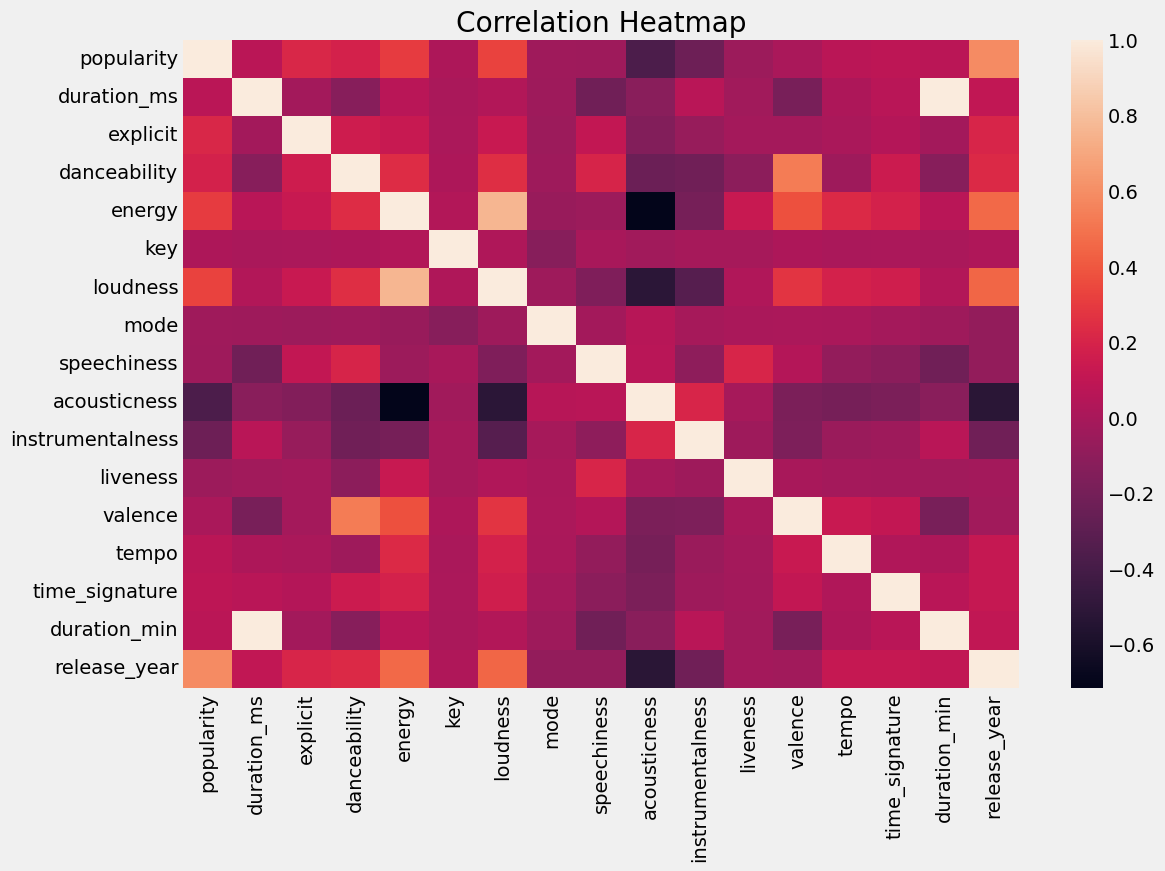

In [9]:
# Using only numeric columns
corr_matrix = df_sub.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix)
plt.title('Correlation Heatmap')
plt.show()